# 使用資料探勘技術分析鐵達尼的乘客資料, 並取得影響乘客最後命運的前三大關鍵因素

## 流程思考：

1. 先對 titanic.csv 檔案進行初步的資料檢閱
2. 了解各Column 的意義
3. 補缺失值
4. Encoding categorical data
5. 特徵縮放 (Feature Scaling) 亦可直接看關聯
6. 關聯性觀察（視覺化）

### 載入資料，並觀察

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Importing the dataset
dataset = pd.read_csv('Datasets/titanic.csv')


先檢視前五筆資料的樣貌

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


可到 Kaggle 網站查詢各個Column 的意義 https://www.kaggle.com/competitions/titanic/data 

| **欄位名稱** |            **定義**           |
|:------------:|:-----------------------------:|
|   Survived   |              存歿             |
|    Pclass    |            購票分級           |
|     Name     |              姓名             |
|      Sex     |              性別             |
|      Age     |              年紀             |
|     SibSp    | 鐵達尼號上的兄弟姊妹/配偶數量 |
|     Parch    |   鐵達尼號上的雙親/子女數量   |
|    Ticket    |            票根號碼           |
|     Fare     |              票價             |
|     Cabin    |            船艙編號           |
|   Embarked   |            登船港口           |

以Pandas 中 Dataframe.info()函式可以顯示資料表內所有欄位的資訊。包含:欄位名稱、非虛值的數目、欄位的資料類型等等。


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


原始表格資料的 Dtype 並非分析時所要的，需要轉換。 <br>
web搜尋方法，將每個欄位修正成相對正確的類型：

In [5]:
dataset.PassengerId = dataset.PassengerId.astype('category')
dataset.Survived = dataset.Survived.astype('category')
dataset.Pclass = dataset.Pclass.astype(int)
dataset.Name = dataset.Name.astype('category')
dataset.Sex = dataset.Sex.astype('category')
dataset.Age = dataset.Age.astype(float)
dataset.SibSp = dataset.SibSp.astype(int)
dataset.Parch = dataset.Parch.astype(int)
dataset.Fare = dataset.Fare.astype(float)
dataset.Cabin = dataset.Cabin.astype('category')
dataset.Embarked = dataset.Embarked.astype('category')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    category
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    int32   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int32   
 7   Parch        891 non-null    int32   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(6), float64(2), int32(3), object(1)
memory usage: 123.4+ KB


In [7]:
# 對所有欄位執行 describe 
dataset.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.0,891.0,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,891.0,2.0,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,1.0,0.0,NaN,"Abbing, Mr. Anthony",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,1.0,549.0,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,NaN,NaN,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,NaN,NaN,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,NaN,NaN,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,NaN,NaN,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,NaN,NaN,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### 補缺失值

觀察到 Age、Cabin、Embarked 皆有缺值，由於缺值會影響分析，但特徵資料對於資料的意義也很重要，個人認為盡量不要直接 drop 掉整個column，盡量蒐集資料補缺值。這部分可以參考 Kaggle 參賽者的分享資訊，Age 的補缺值方式並非隨意補值，其牽涉到背景邏輯的合理因素。<br>
例如：Age 可能和 家長是否有帶家人小孩一起登船（與SibSp、Parch 有關），而家庭登船大多會選在同一個登船港口、船艙，所以補值時可以參照。


由於補值參照資料牽涉其他複雜的分析，本作業擬簡化步驟直接先對缺失資料值最多的 Cabin 捨去不用。 對 Age 欄位以中位數補值，對 Embarked 欄位以眾數資料補值。
而PassengerId、Name、Ticket也捨去不用

In [8]:
#查看 Embarked 資料中出現最高頻率的值
print(dataset.Embarked.value_counts())


S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [9]:
dataset["Age"] = dataset["Age"].fillna(dataset["Age"].median())  # 對 Age 欄位以中位數補值
dataset["Embarked"] = dataset["Embarked"].fillna("S")  # 全部缺值用出現頻率最高的 「S」填入
dataset = dataset.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int32   
 2   Sex       891 non-null    category
 3   Age       891 non-null    float64 
 4   SibSp     891 non-null    int32   
 5   Parch     891 non-null    int32   
 6   Fare      891 non-null    float64 
 7   Embarked  891 non-null    category
dtypes: category(3), float64(2), int32(3)
memory usage: 27.5 KB


In [10]:
# 查看更新後的dataset 的 describe
dataset.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.0,891.000000,891,891.000000,891.000000,891.000000,891.000000,891
unique,2.0,NaN,2,NaN,NaN,NaN,NaN,3
top,0.0,NaN,male,NaN,NaN,NaN,NaN,S
freq,549.0,NaN,577,NaN,NaN,NaN,NaN,646
mean,NaN,2.308642,NaN,29.361582,0.523008,0.381594,32.204208,NaN
std,NaN,0.836071,NaN,13.019697,1.102743,0.806057,49.693429,NaN
min,NaN,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,NaN,2.000000,NaN,22.000000,0.000000,0.000000,7.910400,NaN
50%,NaN,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,NaN,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN


In [11]:
# 查看補值、刪除欄位後的表格
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


在還沒做 類別變量轉換之前，先以 Seaborn 的熱度圖觀察表徵之間的線性關聯。

C:\Users\Tibame_T14\AppData\Local\Temp\ipykernel_13376\3711769078.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  feature_corr = dataset.corr()


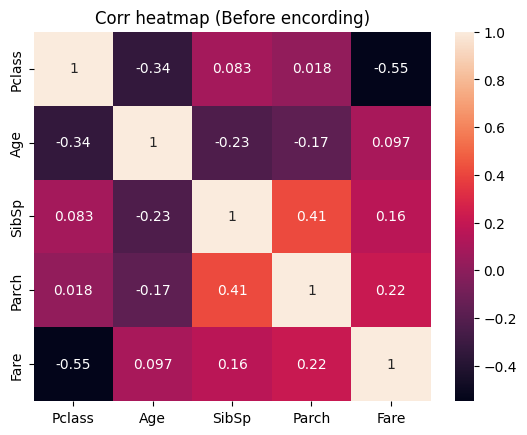

In [12]:
#使用seaborn的熱度圖觀察表徵之間的線性關聯
import seaborn as sns
plt.figure()
feature_corr = dataset.corr()
sns.heatmap(feature_corr, annot=True)
plt.title("Corr heatmap (Before encording)")
plt.show()

In [13]:
dataset.loc[:, "Survived"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: category
Categories (2, int64): [0, 1]

### Encoding categorical data (文字轉數字)

In [14]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder = LabelEncoder()
dataset.loc[:, "Survived"] = labelencoder.fit_transform(dataset.loc[:, "Survived"])
dataset.loc[:, "Sex"] = labelencoder.fit_transform(dataset.loc[:, "Sex"])

## 寫法草稿一
# onehotencoder = OneHotEncoder()
# dataset = onehotencoder.fit_transform(dataset["Embarked"].array.reshape(1, -1)).toarray()

# 寫法草稿二（類似範例）
onehotencoder = ColumnTransformer(transformers=[("Embarked", OneHotEncoder(), ["Embarked"])], remainder = 'passthrough')
onehot_Embarked = onehotencoder.fit_transform(dataset)   # onehot_Embarked 為 array型態
dataset_encoding = pd.DataFrame(onehot_Embarked, columns = [
    'Embarked_C','Embarked_Q', 'Embarked_S', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype=int) 


C:\Users\Tibame_T14\AppData\Local\Temp\ipykernel_13376\536368733.py:7: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataset.loc[:, "Survived"] = labelencoder.fit_transform(dataset.loc[:, "Survived"])
C:\Users\Tibame_T14\AppData\Local\Temp\ipykernel_13376\536368733.py:8: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataset.loc[:, "Sex"] = labelencoder.fit_transform(dataset.loc[:, "Sex"])
C:\Users\Tibame_T14\AppData\Local\Temp\ipykernel_13376\536368733.py:17: FutureWarning: In a future version, passing float-dtype values and an integer dtype to DataF

In [15]:
dataset_encoding

,Embarked_C,Embarked_Q,Embarked_S,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,0,1,0,3,1,22,1,0,7
1,1,0,0,1,1,0,38,1,0,71
2,0,0,1,1,3,0,26,0,0,7
3,0,0,1,1,1,0,35,1,0,53
4,0,0,1,0,3,1,35,0,0,8
...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,0,2,1,27,0,0,13
887,0,0,1,1,1,0,19,0,0,30
888,0,0,1,0,3,0,28,1,2,23
889,1,0,0,1,1,1,26,0,0,30


Emarked欄位已經被編碼為三個虛擬變量，分別代表三個港口上船與否的欄位。

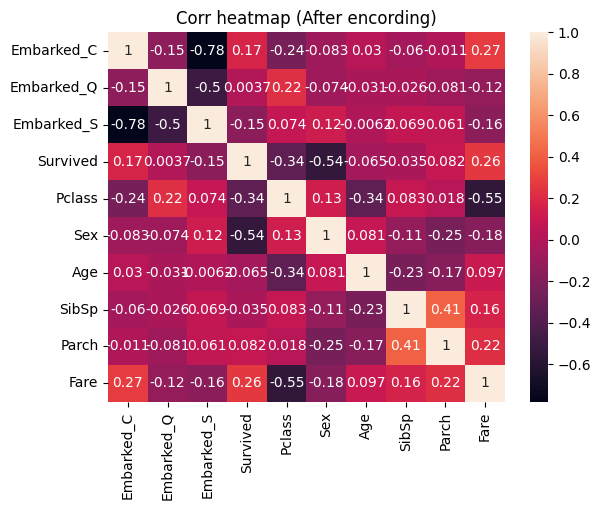

In [16]:
# 使用seaborn的熱度圖觀察表徵之間的線性關聯

plt.figure()
feature_corr_encoding = dataset_encoding.corr()
sns.heatmap(feature_corr_encoding, annot=True)
plt.title("Corr heatmap (After encording)")
plt.show()

### Feature Scaling

In [17]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler() 
sc_data = minmaxscaler.fit_transform(dataset_encoding.iloc[:, :])

# 將 sc_data 轉成 dataframe
dataset_encoding_sc = pd.DataFrame(sc_data, columns = [
    'Embarked_C','Embarked_Q', 'Embarked_S', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype=float) 


In [18]:
dataset_encoding_sc

,Embarked_C,Embarked_Q,Embarked_S,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.0,0.0,1.0,0.0,1.0,1.0,0.2750,0.125,0.000000,0.013672
1,1.0,0.0,0.0,1.0,0.0,0.0,0.4750,0.125,0.000000,0.138672
2,0.0,0.0,1.0,1.0,1.0,0.0,0.3250,0.000,0.000000,0.013672
3,0.0,0.0,1.0,1.0,0.0,0.0,0.4375,0.125,0.000000,0.103516
4,0.0,0.0,1.0,0.0,1.0,1.0,0.4375,0.000,0.000000,0.015625
...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.0,1.0,0.0,0.5,1.0,0.3375,0.000,0.000000,0.025391
887,0.0,0.0,1.0,1.0,0.0,0.0,0.2375,0.000,0.000000,0.058594
888,0.0,0.0,1.0,0.0,1.0,0.0,0.3500,0.125,0.333333,0.044922
889,1.0,0.0,0.0,1.0,0.0,1.0,0.3250,0.000,0.000000,0.058594


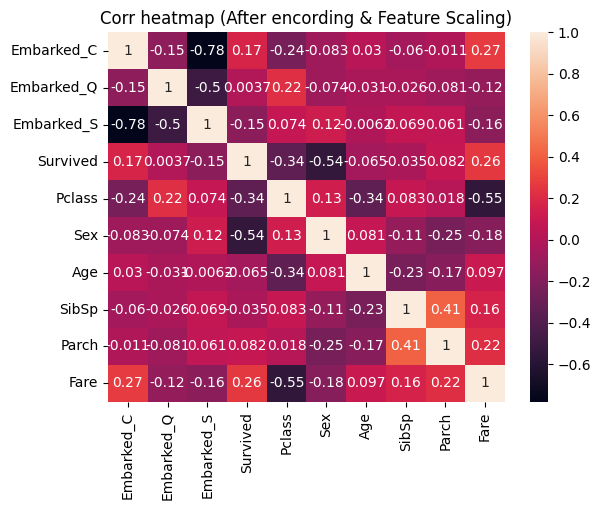

In [19]:
# 使用seaborn的熱度圖觀察表徵之間的線性關聯

plt.figure()
feature_corr_encoding_sc = dataset_encoding_sc.corr()
sns.heatmap(feature_corr_encoding_sc, annot=True)
plt.title("Corr heatmap (After encording & Feature Scaling)")
plt.show()

由 seaborn的熱度圖觀察表徵之間的線性關聯，可以發現影響生還的前三大關鍵因素：
1. Sex (性別)，為負相關，{男: 1, 女: 0}， corr=-0.54
2. Pclass（購票等級），corr=-0.34，票等1 愈容易生還，票等3愈不易生還
3. Fare（票價），corr=0.26 ，表示票價愈貴愈容易生還